# **Predicting Advertisement Clicks Using Machine Learning**

The objective of this project is to predict whether a user will click on an advertisement on a website based on their behaviour and profile. When a user visits a site, businesses want to know if they are likely to engage with an ad. By analyzing past data on ad clicks and user activity, a model can be built to make better predictions. This helps businesses show ads to the right people and improve their marketing efforts.

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset
The file Ad click data.csv contains historical data on users and the ads they were exposed to, along with whether they clicked on the ad or not. The goal is to analyze this data and build a model to predict whether a user will click on an ad on the website.

In [3]:
import pandas as pd
import numpy as np

# Reading the dataset
AdClickData=pd.read_csv("Ad click Data.csv", encoding='latin')
AdClickData.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


**Data Description**

This data set contains the following features:
- **VistID:** The id for the user visit on website
- **Time_Spent:** Average time spent by user on site in minutes
- **Age:** User age in years
- **Avg_Income:** Average Income of geographical area of user
- **Internet_Usage:** Average minutes a day user spent on the internet
- **Ad_Topic:** Headline of the advertisement
- **Country_Name:** Country of user
- **City_Code:** City of user
- **Male:** Whether or not user was male
- **Time_Period:** Time at which consumer clicked on Ad
- **Weekday:** Name of the day
- **Month:** Name of the months
- **Year:** Which year the data is collected
- **Clicked:** 0 means not clicked and 1 means that user clicked the Ad.

**Removing duplicate rows if any**

In [4]:
print("Shape of the dat before removing duplicate values: ", AdClickData.shape)

# Removing duplicate values is any
AdClickData=AdClickData.drop_duplicates()
print("Shape of the data fter removing duplicate values: ",AdClickData.shape)

Shape of the dat before removing duplicate values:  (6657, 14)
Shape of the data fter removing duplicate values:  (6657, 14)


- There are no duplicate values present in the datast

## Define the problem Statement

**To create a predictive model that can determine whether a user will click on a given product advertisement or not.**


**Target Variable:** Clicked
- Clicked=1 means the ad was clicked.
- Clicked=0 means the ad was NOT clicked.

**Predictors:** Time_Spent, Age, Avg_Income, Internet_Usage, Ad_Topic... etc.

**Determining the type of Machine Learning:** Since our goal is to predict whether a user will click on a given product advertisement or not, this makes it a binary classification problem. Therefore, a supervised machine learning classification model is needed.

## Looking at the distribution of Target Variable
In a classification problem, having a balanced distribution of classes is desirable, otherwise it can affect the machine learning algorithm's ability to learn all classes effectively. When one class has significantly more instances than the others, the model struggles to learn patterns for the minority class. This results in biased predictions favoring the majority class, leading to misleading accuracy and poor generalization. To improve model performance and ensure fair predictions, it is important to address class imbalance using appropriate techniques.

<Axes: xlabel='Clicked'>

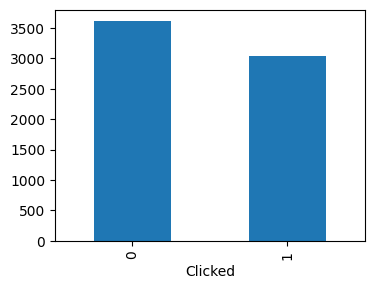

In [5]:
%matplotlib inline
groupdata=AdClickData.groupby("Clicked").size()
groupdata.plot(kind='bar', figsize=(4,3))

- The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

## Basic Data Exploration
This step helps in understanding the overall data, including its size and column types (Quantitative, Categorical, or Qualitative). It also helps in identifying irrelevant columns by evaluating their impact on the target variable. If a column does not influence whether the advertisement is clicked or not, it should be removed; otherwise, it should be retained for further analysis.

In [6]:
# Looking at sample rows in the data
AdClickData.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [7]:
AdClickData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [8]:
AdClickData.describe(include='all')

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657,6657,6657,6657,6657,6657,6657,6657.0,6657.000000
unique,NaN,NaN,NaN,NaN,NaN,30,237,9,2,6,7,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,product_22,Canada,City_1,No,Evening,Friday,January,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,266,46,2559,3571,1266,986,988,NaN,NaN
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,1.000000


In [9]:
AdClickData.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

In [10]:
AdClickData.isnull().sum()

VistID            0
Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
Country_Name      0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Year              0
Clicked           0
dtype: int64

**Basic Data Exploration Results**

Based on the basic data exploration, create a simple report summarizing the data and noting observations for each column.
- **VistID:** Qualitative | Rejected | This column does not affect the ad click
- **Time_Spent:** Continuous | Selected
- **Age:** Continuous | Selected
- **Area_Income:** Continuous | Selected
- **Internet_Usage:** Continuous | Selected
- **Ad_Topic:** Categorical | Selected
- **Country_Name:** Qualitative | Rejected | This column has very high cardinality
- **City_Code:** Categorical | Selected
- **Male:** Categorical | Selected
- **Time_Period:** Categorical | Selected
- **Weekday:** Categorical | Selected
- **Month:** Categorical | Selected
- **Year:** Qualitative | Rejected | This column does not affect the ad click
- **Clicked:** Categorical | Selected | This is the **Target Variable**

The selected columns at this stage are not final, further analysis will be conducted before creating the final list.

## Removing useless variables from data
Based on the above report, the 'VisitID', 'Country_Name', and 'Year' columns are being removed from the data because they do not affect whether an advertisement is clicked or not.

In [11]:
uselessColumns=['VistID','Country_Name','Year']
AdClickData=AdClickData.drop(uselessColumns, axis=1)
AdClickData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


## Visual Exploratory Data Analysis
- Categorical variables: Bar plot
- Continuous variables: Histogram

**Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

Based on the basic data exploration, the data contains six categorical predictors: "Ad_Topic", "City_code", "Male" ,"Time_Period", "Weekday", "Month"

Bar charts are used to visualize the distribution of data for categorical predictors.

In [12]:
# Plotting multiple bar charts at once for categorical variables
# Since no default function exists to plot bar charts for multiple columns at once, a custom function is being defined for this purpose
def PlotBarCharts(inputdata, ColumnsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subplot=plt.subplots(nrows=1, ncols=len(ColumnsToPlot), figsize=(40,6))
    fig.suptitle('Bar Charts of:'+str(ColumnsToPlot))

    for ColName, PlotNumber in zip(ColumnsToPlot, range(len(ColumnsToPlot))):
        inputdata.groupby(ColName).size().plot(kind='bar',ax=subplot[PlotNumber])
    

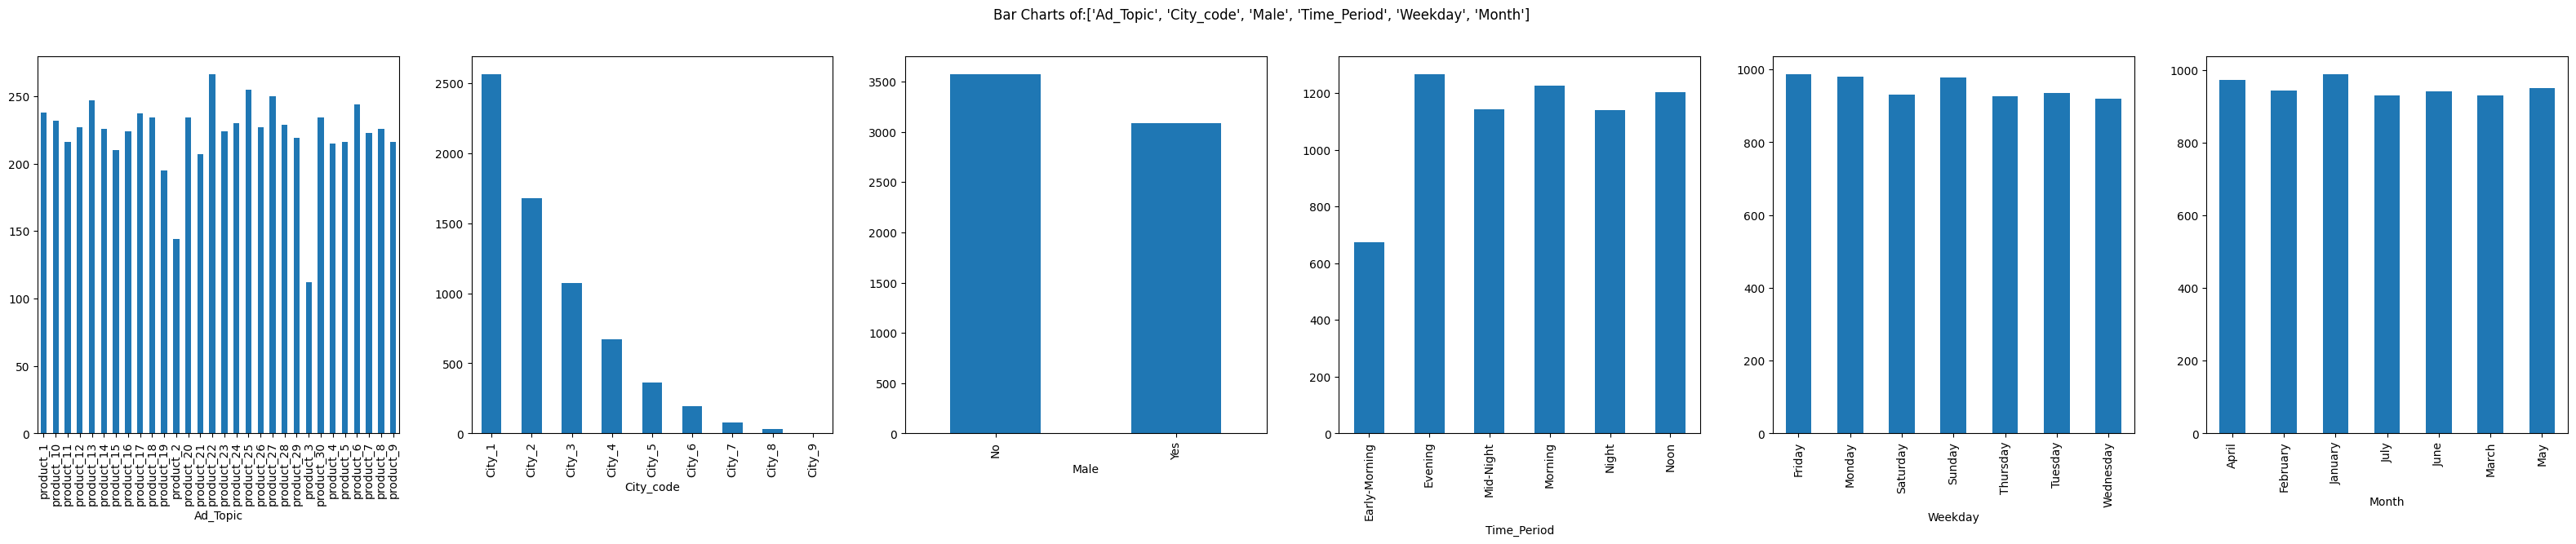

In [13]:
# Calling the function
CatgColms=['Ad_Topic','City_code','Male','Time_Period','Weekday','Month']
PlotBarCharts(inputdata=AdClickData, ColumnsToPlot=CatgColms)

**Bar Charts Interpretation**

These bar charts show the frequencies of each category on the Y-axis and the category names on the X-axis.

An ideal bar chart, like that of the "Weekday" and "Month" column, has comparable frequencies across categories, ensuring enough data for the ML algorithm to learn.

However, if a column has a highly skewed distribution, where one category dominates while others have very few instances, it may not be very useful for machine learning. This is further evaluated in the correlation analysis section, where a final decision is made on whether to keep or remove the column.

In this dataset, all categorical columns have a satisfactory distribution for machine learning.

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the basic data exploration, the data contains four continuous predictor: "Time_Spent", "Age", "Avg_Income" and "Internet_Usage"

Histograms are used to visualize the distribution of continuous predictor.

array([[<Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Income'}>,
        <Axes: title={'center': 'Internet_Usage'}>]], dtype=object)

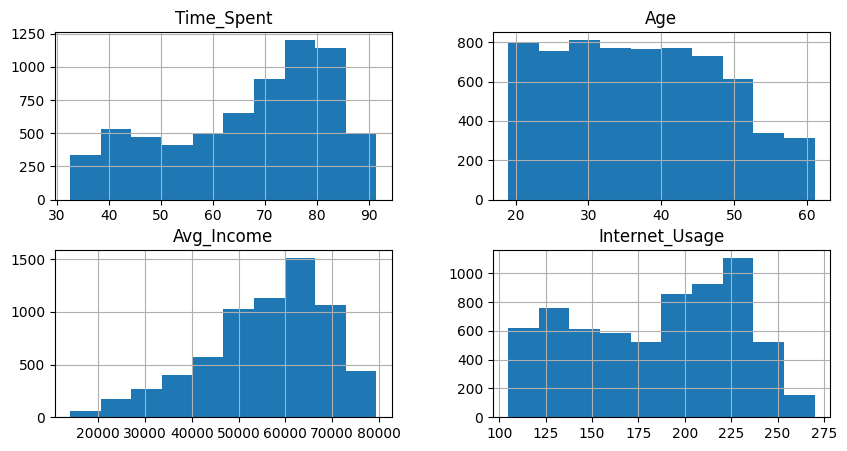

In [14]:
# Plotting histograms of multiple continuous columns together
AdClickData.hist(['Time_Spent','Age','Avg_Income','Internet_Usage'], figsize=(10,5))

**Histogram Interpretation**

Histograms show the data distribution for each continuous variable. The X-axis represents the range of values, while the Y-axis shows the frequency of values within that range. The ideal histogram outcome is a bell curve or a slightly skewed bell curve. If there is excessive skewness, outlier treatment should be applied, and the column should be re-examined. If the issue persists, the column may be considered for removal.

**Selected Continuous Variables:**
- **Time_Spent:** Selected
- **Age:** Selected
- **Avg_Income:** Selected | Slightly negative skewed distribution, acceptable.
- **Internet_Usage:** Selected

## Outliers Treatment
Outliers are extreme values that deviate significantly from most of the data. They can be identified by examining the tails of a histogram. Outliers can bias the training of machine learning models, as the algorithm may attempt to fit these extreme values, deviating from the majority of the data.

Outliers should be treated one column at a time, as the appropriate treatment may vary for each column. Outlier values are imputed with a logical business value, determined through histogram analysis.

- In this data, none of the predictors have outliers; hence, no treatment is required

## Missing values Treatments
If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.
Missing values are treated for each column separately.

In [15]:
# Finding how many missing values are there for each column
AdClickData.isnull().sum()

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64

- In this dataset, none of the columns have missing values; hence, missing value treatment is not required.

## Feature Selection
Now, it is time to select the best features (columns) that are correlated with the target variable. This can be done by measuring correlation values or using statistical tests like ANOVA and Chi-Square. Additionally, visualizing the relationship between the target variable and predictors helps in understanding the data better. Below are the techniques used for both visualizing relationships and statistically measuring their strength.

**Categorical Target Variable Vs Continuous Predictor**
- Box Plot - Visual exploration
- ANOVA test - Statistical measurement

**Categorical Target Variable Vs Categorical Predictor**
- Grouped Bar Plots - Visual exploration
- Chi-Square test - Statistical measurement

**Visual Relationship Exploration: Categorical Vs Continuous - Box Plots**

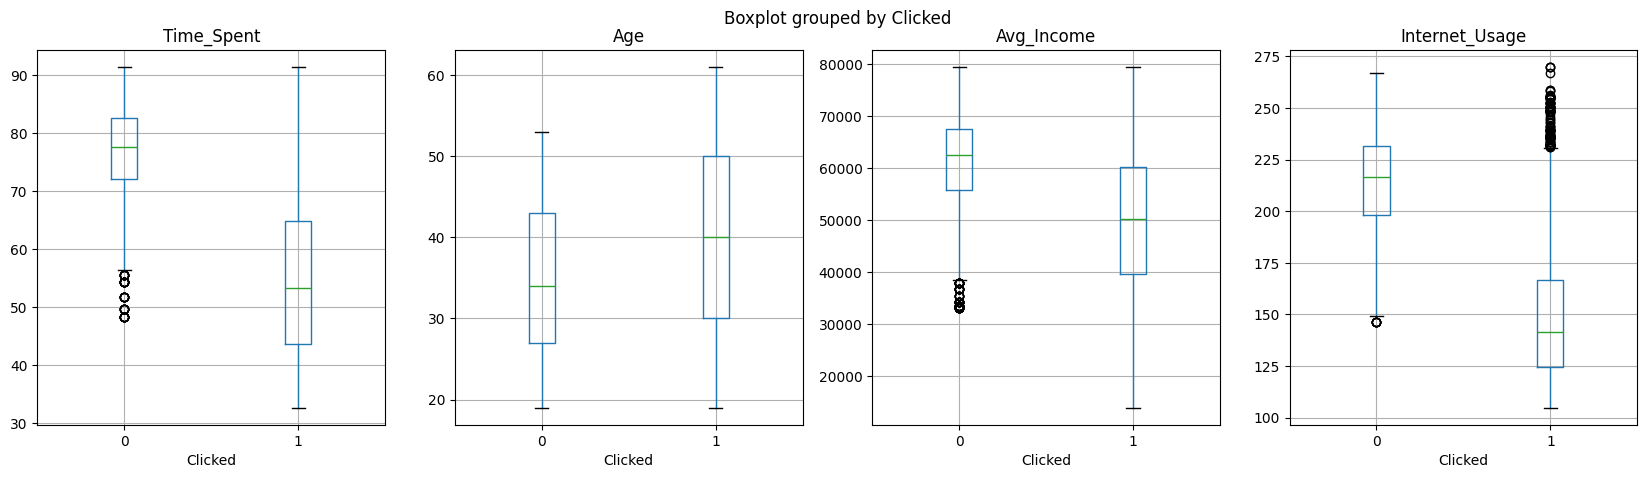

In [16]:
# Box Plots for categorical Target variable 'Clicked' and Continuous predictors
ContinuousPredictors=['Time_Spent','Age','Avg_Income','Internet_Usage']

import matplotlib.pyplot as plt
fig, subplot=plt.subplots(nrows=1, ncols=len(ContinuousPredictors), figsize=(20,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol, plotNumber in zip(ContinuousPredictors, range(len(ContinuousPredictors))):
    AdClickData.boxplot(column=PredictorCol, by='Clicked', figsize=(5,5), vert=True, ax=subplot[plotNumber])


**Box-Plots interpretation**

These plots show how a continuous predictor (Y-axis) is distributed across different categories (X-axis).

If the distributions look similar across categories (boxes align), it means the continuous variable has no effect on the target variable, so they are not correlated.

For example, consider the first chart, "Time_Spent" vs. "Clicked". The box plots are not aligned, indicating a difference in distribution. Observing the data, users who clicked on ads tend to have spent less time compared to those who didn’t. This suggests a potential pattern that can be learned using ML algorithms, making "Time_Spent" correlated with the target variable, "Clicked".

The other three charts exhibit similar patterns, indicating that all four continuous predictors show a relationship with the target variable.

This correlation is further validated by the ANOVA test results presented below.

**Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [17]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionANOVA(inputData, TargetVariable, ContinuousPredictor):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedColumns=[]

    for predictor in ContinuousPredictors:
        CategoryGroupList=inputData.groupby(TargetVariable)[predictor].apply(list)
        ANOVAresult=f_oneway(*CategoryGroupList)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if ANOVAresult[1] < 0.05:
            print(predictor, "is correlated with", TargetVariable, '| P-Value: ', ANOVAresult[1])
            SelectedColumns.append(predictor)
        else:
            print(predictor, "is NOT correlated with", TargetVariable, '| P-Value: ', ANOVAresult[1])

    return(SelectedColumns)


In [18]:
# Calling the function to check which categorical variables are correlated with target
ContinuousPredictors=['Time_Spent','Age','Avg_Income','Internet_Usage']
FunctionANOVA(inputData=AdClickData, TargetVariable='Clicked', ContinuousPredictor=ContinuousPredictors)

Time_Spent is correlated with Clicked | P-Value:  0.0
Age is correlated with Clicked | P-Value:  6.40789044460054e-91
Avg_Income is correlated with Clicked | P-Value:  0.0
Internet_Usage is correlated with Clicked | P-Value:  0.0


['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']

* The ANOVA test results confirm our visual analysis from the box plots above, indicating that all four columns are correlated with the target variable, **"Clicked"**.

<b>Visual Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts<b>

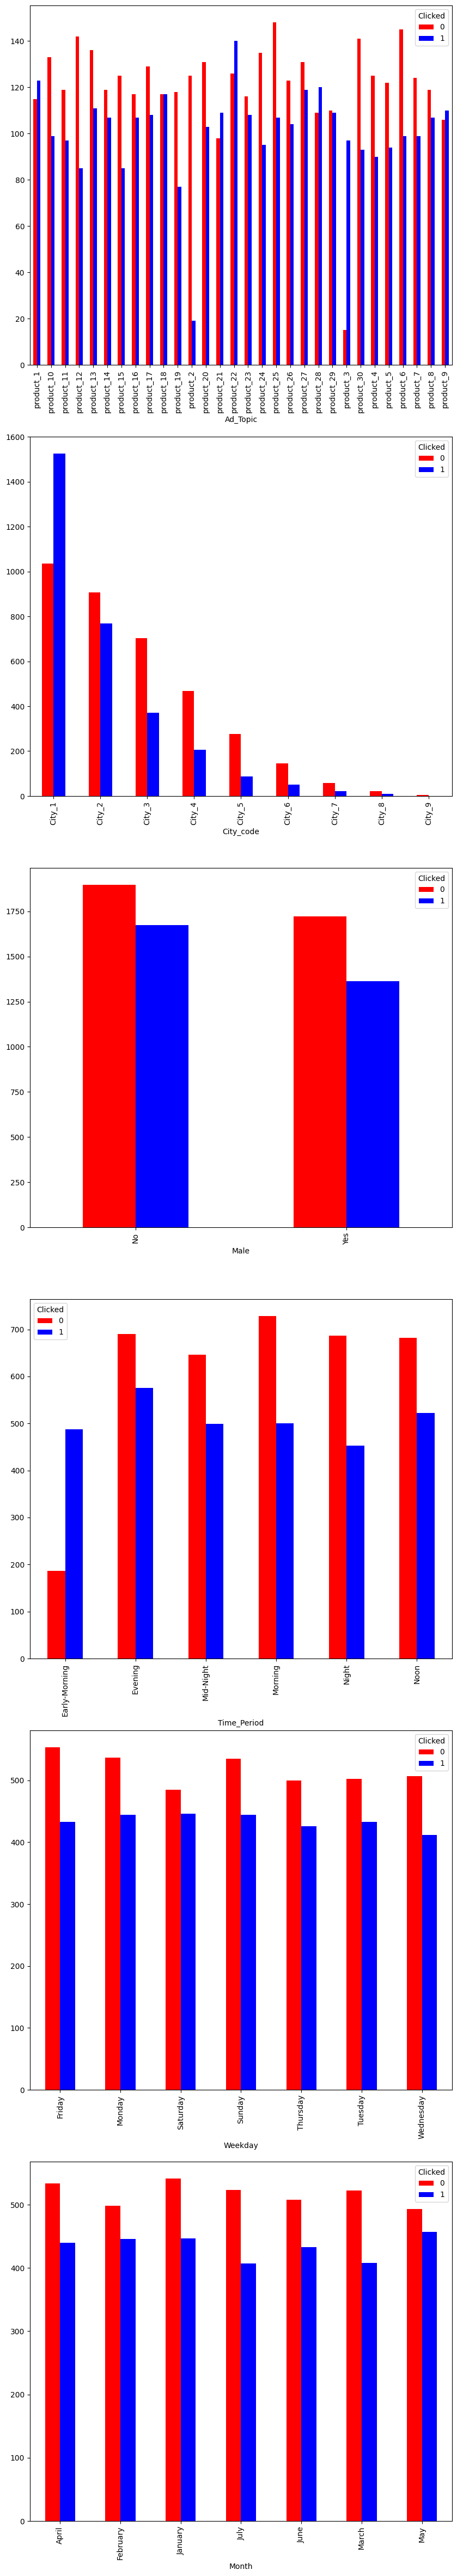

In [19]:
CategoricalColumns=['Ad_Topic','City_code','Male','Time_Period','Weekday','Month']

import matplotlib.pyplot as plt
fig, subplot=plt.subplots(nrows=len(CategoricalColumns), ncols=1, figsize=(10,60))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CatgCols, PlotNum in zip(CategoricalColumns, range(len(CategoricalColumns))):
    CrossTabResult=pd.crosstab(index=AdClickData[CatgCols], columns=AdClickData['Clicked'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=subplot[PlotNum])

**Grouped Bar charts Interpretation**

These grouped bar charts show frequency on the Y-axis and categories on the X-axis. If the bar ratios are similar across all categories, the two variables are not correlated.

For example, in the Month vs. Clicked plot, the Clicked vs. Not-Clicked ratio remains similar across all months, indicating that Month does not influence Ad Clicks. Hence, these two variables are not correlated.

On the other hand, the Time_Period vs. Clicked plot shows a higher number of clicks in the Early Morning, suggesting that Time_Period impacts Ad Clicks, making these two variables correlated.

This analysis is further validated in the following section using Chi-Square Tests.

**Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test**

Chi-Square test is conducted to check the correlation between two categorical variables

In [20]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChiSquare(inputdata, TargetVariable, CategoricalVariable):
    from scipy.stats import chi2_contingency

    # creating a empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariable:
        CrossTabResult=pd.crosstab(index=inputdata[TargetVariable], columns=inputdata[predictor])
        ChiSqrResult=chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if ChiSqrResult[1]<0.05:
            print(predictor, "is correlated with", TargetVariable, '| P-value:', ChiSqrResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, "is NOT correlated with", TargetVariable, '| P-value:', ChiSqrResult[1])
    
    return(SelectedPredictors)


In [21]:
CategoricalColumns=['Ad_Topic','City_code','Male','Time_Period','Weekday','Month']

# calling the function
FunctionChiSquare(inputdata=AdClickData, TargetVariable='Clicked', CategoricalVariable=CategoricalColumns)

Ad_Topic is correlated with Clicked | P-value: 1.2676573604736462e-24
City_code is correlated with Clicked | P-value: 2.6667953391697526e-88
Male is correlated with Clicked | P-value: 0.02695171301745074
Time_Period is correlated with Clicked | P-value: 4.465745015735695e-47
Weekday is NOT correlated with Clicked | P-value: 0.7226317326250824
Month is NOT correlated with Clicked | P-value: 0.4229049097263303


['Ad_Topic', 'City_code', 'Male', 'Time_Period']

- Based on the Chi-Square test results, the following categorical columns are selected as predictors for machine learning:  'Ad_Topic', 'City_code', 'Male', 'Time_Period'

## Selecting final predictors for Machine Learning

In [22]:
# Based on the above tests, selecting the final columns for machine learning
SelectedColumns=["Time_Spent", "Age", "Avg_Income", "Internet_Usage",
                "Ad_Topic", "City_code", "Male", "Time_Period"]

# Selecting final columns for ML
DataForML=AdClickData[SelectedColumns]
DataForML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [23]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning

**Converting the binary nominal variable to numeric using 1/0 mapping**

In [24]:
# Converting the binary nominal variable to numeric using 1/0 mapping
DataForML['Male'].replace({'Yes':1,'No':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


<b>Converting the nominal variable to numeric using get_dummies()<b>

In [25]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

In [26]:
# Adding Target Variable to the data
DataForML_Numeric['Clicked']=AdClickData['Clicked']

# Printing sample rows
DataForML_Numeric.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon,Clicked
0,87.97,43,55901.12,185.46,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,0
1,51.63,50,39132.00,176.73,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
2,82.37,38,57032.36,210.60,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
3,62.06,45,48868.00,190.05,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
4,77.66,31,61608.23,204.86,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,0


## Machine Learning: Splitting the data into Training and Testing sample
The entire dataset is not used for model creation. A portion of the data is randomly set aside to evaluate the model's performance, known as testing data, while the remaining data, called training data, is used to build the model. Typically, 70% of the data is allocated for training, and 30% is used for testing.

In [27]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

**Separate Target Variable and Predictor Variables**

In [28]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked'
Predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

<b>Standardization/Normalization of data<b>

In [29]:
# Standarization of Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
# PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

**Splitting the data into Training and Testing sample**

In [30]:
# Split the data into Training and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [31]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4659, 50)
(4659,)
(1998, 50)
(1998,)


## Logistic Regression

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# choose from different tunable hyper parameters
clf=LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Creating the model on Training data
LOG=clf.fit(X_train, y_train)

# Creating prediction on test data
prediction=LOG.predict(X_test)

# Measuring accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test,prediction))

# Printing the overall acuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG,X,y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold cross validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1090
           1       0.94      0.89      0.92       908

    accuracy                           0.93      1998
   macro avg       0.93      0.92      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1040   50]
 [  96  812]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold cross validation:
 [0.93693694 0.88773764 0.92472202 0.93975226 0.92611277 0.94273948
 0.94273948 0.94280626 0.93519986 0.93517856]

Final Average Accuracy of the model: 0.93


# Decision Tree

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1090
           1       0.95      0.88      0.91       908

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998

[[1044   46]
 [ 112  796]]
Accuracy of the model on testing Sample Data:  0.92

Accuracy values for 10-fold Cross Validation:
 [0.92022157 0.88081772 0.87852085 0.92454929 0.91859248 0.90248142
 0.89802557 0.93671902 0.92588299 0.90685001]

Accuracy values for 10-fold Cross Validation:
 0.91


<Axes: >

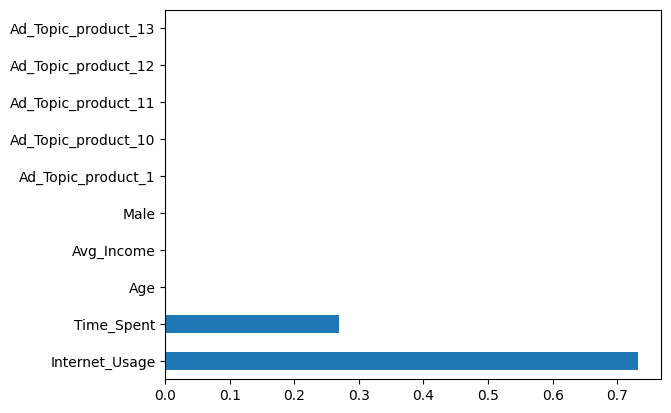

In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# choose from different tunable hyper parameters
clf=DecisionTreeClassifier(max_depth=2, criterion='entropy')

# Creating the model on traing data
DTree=clf.fit(X_train, y_train)

# Creating prediction on Test data
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Print overall accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on testing Sample Data: ', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nAccuracy values for 10-fold Cross Validation:\n', round(Accuracy_Values.mean(),2))

# Ploting the feature importance for top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Random Forest

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1090
           1       0.97      0.86      0.91       908

    accuracy                           0.92      1998
   macro avg       0.93      0.92      0.92      1998
weighted avg       0.93      0.92      0.92      1998

[[1065   25]
 [ 127  781]]
Accuracy of the model on testing sample data:  0.92

Accuracy value for 10-fold cross validation:
 [0.92293844 0.87736034 0.91052359 0.93502653 0.90761031 0.93487284
 0.90618224 0.93353183 0.91174208 0.91647042]

Final Average accuracy of the model:
 0.92


<Axes: >

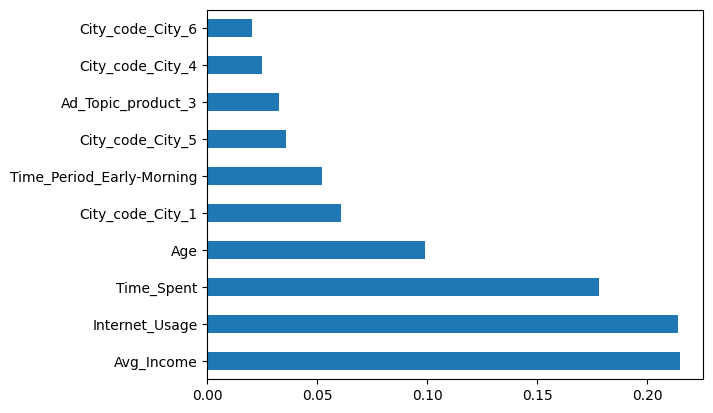

In [34]:
# Random FOrest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier

# choose from different tunable hyper parameters
clf=RandomForestClassifier(max_depth=2, n_estimators=100, criterion='gini')

# Creating model on the training data
RF=clf.fit(X_train, y_train)

# Creating prediction on test data
prediction=RF.predict(X_test)

# Measuring the accuarcy on the testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the overall accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on testing sample data: ', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print("\nAccuracy value for 10-fold cross validation:\n", Accuracy_Values)
print("\nFinal Average accuracy of the model:\n", round(Accuracy_Values.mean(),2))

# Plotting the feature importance for top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# AdaBoost

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1090
           1       0.96      0.90      0.93       908

    accuracy                           0.94      1998
   macro avg       0.94      0.94      0.94      1998
weighted avg       0.94      0.94      0.94      1998

[[1060   30]
 [  93  815]]
Accuracy of the model on Testing data: 0.94

Accuracy values for 10-fold cross validation:
 [0.93679193 0.90742786 0.93502653 0.94116318 0.93655492 0.9577476
 0.94719772 0.94270009 0.94556126 0.950233  ]

Final average Accuracy of the model: 0.94


<Axes: >

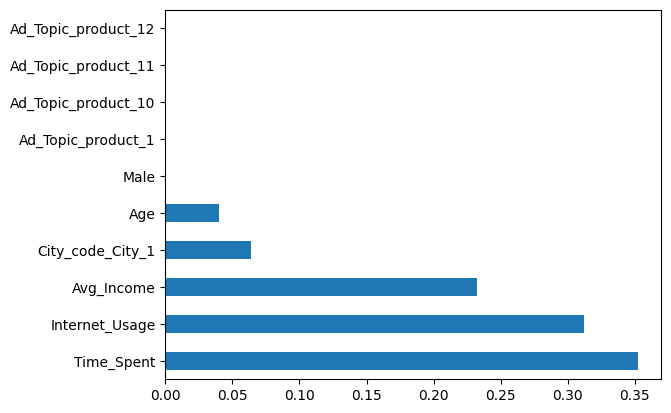

In [35]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Chosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf=AdaBoostClassifier(n_estimators=500, estimator=DTC, learning_rate=0.01)

# Creating model on Training data
AB=clf.fit(X_train, y_train)

# Creating prediction on Test data
prediction=AB.predict(X_test)

# Measuring Accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing data:', round(F1_Score,2))

# Imporing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X, y, cv=10, scoring='f1_weighted')
print("\nAccuracy values for 10-fold cross validation:\n", Accuracy_Values)
print("\nFinal average Accuracy of the model:", round(Accuracy_Values.mean(),2))

# Ploting the feature importance for top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## XGBoost

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1090
           1       0.95      0.89      0.92       908

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1050   40]
 [ 101  807]]
Accuracy of the model on Testing Sample data:  0.93

Accuracy values for 10-fold cross validation:
 [0.920338   0.89365791 0.91377386 0.92905824 0.93655492 0.93509584
 0.93668304 0.93666852 0.93492278 0.93811431]

Final average accuracy of the model:  0.93


<Axes: >

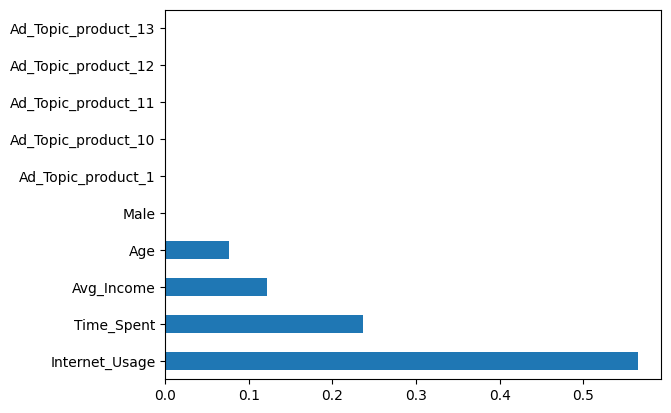

In [36]:
# Xtreme Gradient Boosting
from xgboost import XGBClassifier


# choose from different tunable hyper parameters
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Creating model on training data
XGB=clf.fit(X_train, y_train)

# Creating prediction on test data
prediction=XGB.predict(X_test)

# Measusing accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the overall accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print("Accuracy of the model on Testing Sample data: ", round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X, y, cv=10, scoring='f1_weighted')
print("\nAccuracy values for 10-fold cross validation:\n", Accuracy_Values)
print("\nFinal average accuracy of the model: ", round(Accuracy_Values.mean(),2))

# Plotting the feature importance for top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## KNN

In [37]:
# K-Nearest Neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Choose from different tunable hyper parameters
clf=KNeighborsClassifier(n_neighbors=3)

# Creating the model on training data
KNN=clf.fit(X_train, y_train)

# Creating prediction on Test data
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing overall accuracy on the Test data
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print("Accuracy of the model on testing data:", round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X, y, cv=10, scoring='f1_weighted')
print("\nAccuracy values for 10-fold cross validation:\n",Accuracy_Values)
print("\nFinal average accuracy of the Model:", round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1090
           1       0.74      0.68      0.71       908

    accuracy                           0.75      1998
   macro avg       0.75      0.74      0.74      1998
weighted avg       0.75      0.75      0.75      1998

[[873 217]
 [290 618]]
Accuracy of the model on testing data: 0.75

Accuracy values for 10-fold cross validation:
 [0.75843342 0.75583557 0.7433355  0.78247402 0.74582845 0.74049448
 0.75483191 0.76644885 0.73787474 0.75479348]

Final average accuracy of the Model: 0.75


## SVM

In [38]:
# Support Vector Machine (SVM)
from sklearn import svm

# choose from different tunable hyper parameters
clf=svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Creating the model on training data
SVM=clf.fit(X_train, y_train)

# Creating prediction on Test data
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing overall accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print("Accuracy of the model on Testing Sample data: ", round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X, y, cv=10, scoring='f1_weighted')
print("\nAccuracy values for 1-fold cross validation:\n", Accuracy_Values)
print("\nFinal average accuracy of the model:",round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      1090
           1       0.95      0.88      0.92       908

    accuracy                           0.93      1998
   macro avg       0.93      0.92      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1052   38]
 [ 109  799]]
Accuracy of the model on Testing Sample data:  0.93

Accuracy values for 1-fold cross validation:
 [0.93839432 0.89506222 0.92160758 0.93512863 0.93353373 0.94259731
 0.94415224 0.94729481 0.94107037 0.93204514]

Final average accuracy of the model: 0.93


## Naive Bayse

In [39]:
# Naive Bayse
from sklearn.naive_bayes import GaussianNB, MultinomialNB

clf=GaussianNB()
# clf=MultinomialNB()

# Creating the model on Training data
NB=clf.fit(X_train, y_train)

# Creating prediction on Testing data
prediction=NB.predict(X_test)

# Measuring the accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the overall acuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print("Accuracy of the model on the Testing sample data:", round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold cross validation:\n', Accuracy_Values)
print("\nFinal average accuracy of the Model: ",round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.89      0.27      0.42      1090
           1       0.52      0.96      0.68       908

    accuracy                           0.58      1998
   macro avg       0.71      0.62      0.55      1998
weighted avg       0.72      0.58      0.54      1998

[[297 793]
 [ 37 871]]
Accuracy of the model on the Testing sample data: 0.54

Accuracy values for 10-fold cross validation:
 [0.51885115 0.56941062 0.52142512 0.55961384 0.56683971 0.52475557
 0.53819316 0.57632213 0.57244641 0.54224533]

Final average accuracy of the Model:  0.55


## Deployment of the Model

Based on the trials, the algorithm that achieves the best average accuracy is selected. In this case, multiple algorithms have produced similar average accuracy, allowing for flexibility in choosing any of them.

Adaboost is chosen as the final model due to its speed and effective use of predictors, as observed in its variable importance chart. It ensures that no single predictor dominates the decision, which is beneficial.

To deploy the model, the following steps are followed:
1.	Train the model using 100% of the available data.
2.	Save the model as a serialized file for storage and future use.
3.	Develop a Python function that integrates with front-end applications to take inputs and return predictions.

<b>Step 1. Retraining the model using 100% data<b>

------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Choosing only the most important variables**

In [40]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked'
# Best predictors based on the multiple variable importance charts above
Predictors=["Time_Spent", 'Age', "Avg_Income", "Internet_Usage"]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [41]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using the Adaboost algorithm with final hyperparamters
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Training the model on 100% Data available
FinalAdaboostModel=clf.fit(X,y)

**Step 2. Save the model as a serialized file which can be stored anywhere**

In [42]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Model
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
# print('pickle file of Predictive Model is saved at Location:',os.getcwd())

**Step 3. Create a python function**

In [43]:
# This function can be called from any front end tools/website
def PredictClickStatus(InputData):
    import pandas as pd
    Num_Input=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Treating the binary nominal variables first
    # Every column which was converted to numeric has to be converted here as well
    InputData['Male'].replace({'Yes':1, 'No':0}, inplace=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=["Time_Spent", 'Age', "Avg_Income", "Internet_Usage"]

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Input]

    # Loading the function fron pickle file
    import pickle
    with open('FinalAdaboostModel.pkl','rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
    
    # Generating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['ClickPrediction'])
    return(PredictedStatus)

## Testing Model with Sample Data

In [44]:
# Calling the function for some new Ads
NewAds=pd.DataFrame(
data=[[87.97,42, 55901.12, 185.46],
     [51.63, 49, 5039132.00, 176.73],
     [70.96, 26, 21773.22, 188.72]],
columns=["Time_Spent", 'Age', "Avg_Income", "Internet_Usage"])

print(NewAds)

   Time_Spent  Age  Avg_Income  Internet_Usage
0       87.97   42    55901.12          185.46
1       51.63   49  5039132.00          176.73
2       70.96   26    21773.22          188.72


In [45]:
# Calling the Function for prediction and storing with the input data
NewAds['ClickPrediction']=PredictClickStatus(InputData= NewAds)
NewAds

,Time_Spent,Age,Avg_Income,Internet_Usage,ClickPrediction
0,87.97,42,55901.12,185.46,0
1,51.63,49,5039132.00,176.73,1
2,70.96,26,21773.22,188.72,1
